# MULTIPLE LINEAR REGRESSION

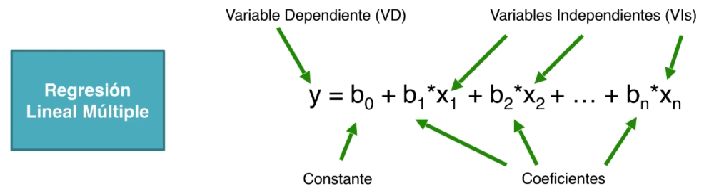

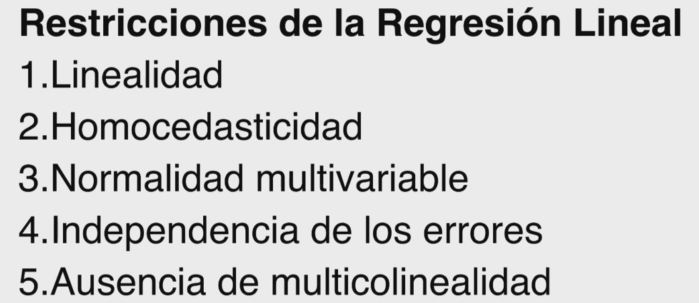

* Variables dummy

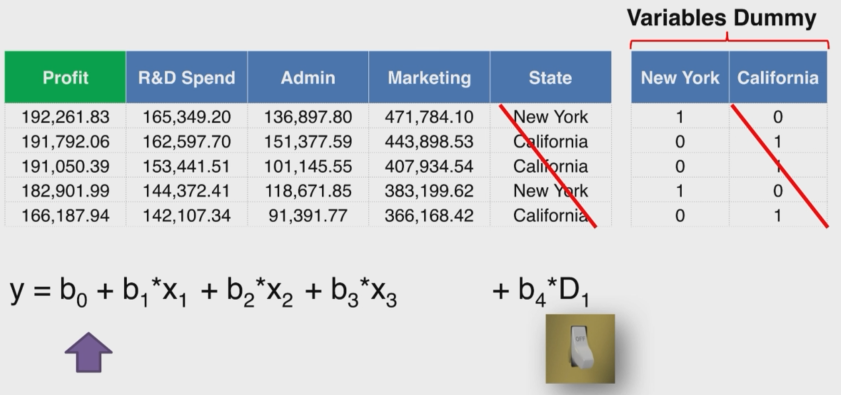

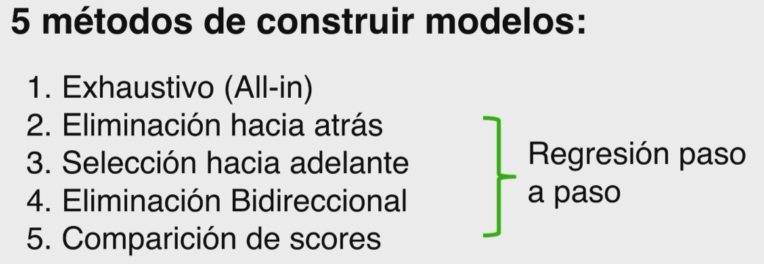

## Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Leer dataset

In [3]:
df = pd.read_csv("C:/Users/Alex/Desktop/R/machine learning/0.dataset/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Procesamiento de datos

### Haciendo uso de label encoder y ohe de sklearn

In [36]:
from  sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Seleccionamos las columnas que queremos codificar
cols_to_encode = ['State']

# Aplicamos Label Encoding a las columnas seleccionadas
# Y transformamos la característica categórica en numérica
df_le = LabelEncoder()
df_encoded = df[cols_to_encode].apply(df_le.fit_transform)
# Imprimimos el dataframe codificado
# print(df_encoded)

# Aplicamos One-Hot Encoding a las columnas codificadas
ohe = OneHotEncoder(sparse_output=False)
ohe_encoded = ohe.fit_transform(df_encoded)

# Obtenemos los nombres de las categorías originales
ohe_columns = ohe.get_feature_names_out(cols_to_encode)

# Creamos un nuevo dataframe con el One-Hot Encoding y los nombres de las columnas
ohe_df = pd.DataFrame(ohe_encoded, columns=ohe_columns)

# Unimos el nuevo dataframe con el dataframe original
new_df = pd.concat([df[['R&D Spend','Administration','Marketing Spend','Profit']], ohe_df], axis=1)

# Imprimimos el nuevo dataframe
new_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0


### Haciendo uso de get_dummies()

In [41]:
# OTRA FORMA
df_dummies = pd.get_dummies(df['State'], drop_first = True) 
    # drop_first = True; dentro del parametro para evitar la multicolinealidad o redundancia
    # donde 0 0 equivaldria a California
# df_dummies.head()

# Añadimos las variables binarias al DataFrame
new_df = df.copy()
new_df = pd.concat([new_df, df_dummies], axis = 1)

# Eliminamos la vairable original race
new_df = new_df.drop(columns=['State'])

new_df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [47]:
new_df.shape

(50, 6)

## Dividir dataset

In [108]:
X = new_df.drop("Profit",axis=1)
y = new_df["Profit"]

In [88]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Escalar los datos

In [44]:
# No es necesario realizar el escalado de las variables en una reg lineal
# from sklearn.preprocessing import StandardScaler
# df_scaler = StandardScaler()
# X_train = df_scaler.fit_transform(X_train)
# X_test = df_scaler.fit_transform(X_test)

## Crear el modelo

In [110]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # crear el modelo
model.fit(X_train, y_train) # entrenar el modelo

LinearRegression()

In [111]:
## obtener coeficientes del modelo
# Imprimir los coeficientes
print(model.coef_ , '\n')
# Imprimir el intercepto
print(model.intercept_)

[ 7.73467193e-01  3.28845975e-02  3.66100259e-02 -9.59284160e+02
  6.99369053e+02] 

42554.16761773237


## Prediccion sobre el conjunto de test

In [112]:
y_pred = model.predict(X_test)

In [113]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

## Evaluar el modelo

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"mae: {mae}")
print(f"mse: {mse}")
print(f"rmse: {rmse}")
print(f"r2: {r2}")

mae: 7514.293659640612
mse: 83502864.03257759
rmse: 9137.990152794957
r2: 0.9347068473282423


## Construyendo el modelo óptimo aplicando la "Eliminacion hacia atrás"

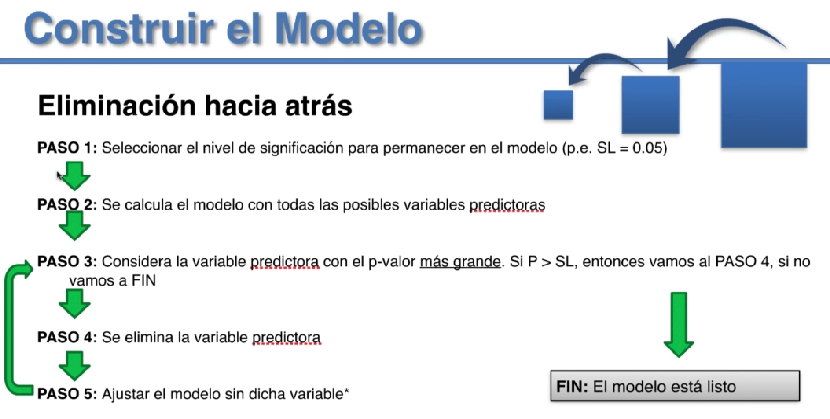

In [89]:
import statsmodels.api as sm
 # agregando una nueva columna de 1s
# X = np.append(arr=X, values = np.ones((50,1)).astype(int)) agregar los 1s al final
X = np.append(arr= np.ones((50,1)).astype(int), values = X, axis=1) #agregar los 1s al inicio

SL = 0.05
X_optima = X[:, [0,1,2,3,4,5]] # asumir al inicio q todas son optimas
regression_OLS = sm.OLS(y, X_optima).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.34e-27
Time:                        15:35:44   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x5           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
## eliminar la variable con el p-value muy alto "X5" > SL
X_optima = X[:, [0,1,2,3,4]] # asumir al inicio q todas son optimas
regression_OLS = sm.OLS(y, X_optima).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           8.49e-29
Time:                        15:39:35   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
## eliminar la variable con el p-value muy alto "X4" > SL
X_optima = X[:, [0,1,2,3]] # asumir al inicio q todas son optimas
regression_OLS = sm.OLS(y, X_optima).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        15:40:56   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
## eliminar la variable con el p-value muy alto "X2">SL
X_optima = X[:, [0,1,3]] # asumir al inicio q todas son optimas
regression_OLS = sm.OLS(y, X_optima).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.16e-31
Time:                        15:43:50   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
## eliminar la variable con el p-value muy alto "X3">SL
X_optima = X[:, [0,1]] # asumir al inicio q todas son optimas
regression_OLS = sm.OLS(y, X_optima).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           3.50e-32
Time:                        15:46:30   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusion

* Para este caso aplicando el metodo de eliminacion hacia atras se concluye que el mejor modelo hallado es un modelo de regresion lineal simple.